In [1]:
#Import NumPy and Pandas Dependencies
import pandas as pd
import numpy as np
from config import db_password # for access to PGAdmin4 postgresql

#import Matplotlib Dependencies
from matplotlib import style # for plotting
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

import psycopg2

from sqlalchemy import create_engine
from getpass import getpass


In [7]:
# db_password = 'db_password'

db_password = getpass ('Enter in Password')

Enter in Password········


In [8]:
#Define the database credentials
credentials = {
'host':'localhost',
'database':'Final_Project_SunshineList',
'user':'postgres',
'password' : db_password
}

In [9]:
def connect(credentials):    
    """ Connect to the PostgreSQL database server """    
    conn = None
    try:        
        # connect to the PostgreSQL server        
        print('Connecting to the PostgreSQL database...')        
        conn = psycopg2.connect(**credentials)    
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        sys.exit(1)
    print("Connection successful")
    return conn

In [10]:
def postgresql_to_dataframe(conn, select_query, column_names):
    """
    Tranform a SELECT query into a pandas dataframe    
    """
    cursor = conn.cursor()
    try:
        cursor.execute(select_query)
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        cursor.close()
        return 1
    
    # Naturally we get a list of tupples
    tupples = cursor.fetchall()
    cursor.close()
    
    # We just need to turn it into a pandas dataframe
    df = pd.DataFrame(tupples, columns=column_names)
    return df

In [11]:
#Connect to Database
conn=connect(credentials)

column_names=['index',
              'year',
              'sector',
              'city',
              'employer',
              'sunshine_job_title',
              'job_title',
              'last_first_name',
              'last_name',
              'first_name',
              'gender',
              'salary_paid',
              'salary_bin',
              'taxable_benefits',
              'total_compensation']

#Execute the Select * query
sunshine_df=postgresql_to_dataframe(conn,"select * from sunshine_table", column_names)
sunshine_df.head()

Connecting to the PostgreSQL database...
Connection successful


,index,year,sector,city,employer,sunshine_job_title,job_title,last_first_name,last_name,first_name,gender,salary_paid,salary_bin,taxable_benefits,total_compensation
0,1639004,2020,Schools,Renfrew,Renfrew County Catholic District School Board,Vice Principal,VP,Mulvihill_Chris,Mulvihill,Chris,M,113978,"$110,000 to $129,999",82,114060
1,1639005,2020,Schools,Waterloo,Waterloo Region District School Board,Psychological Services Consultant,Consultant,Mulvihill_Lisa,Mulvihill,Lisa,F,110500,"$110,000 to $129,999",82,110582
2,1639015,2020,Schools,Shelburne,Dufferin-Peel Catholic District School Board,Vice Principal,VP,Mundy_Laurie,Mundy,Laurie,F,113479,"$110,000 to $129,999",264,113743
3,1639023,2020,Schools,Toronto,Toronto District School Board,Vice Principal Elementary,VP,Munro_Catherine,Munro,Catherine,F,115624,"$110,000 to $129,999",0,115624
4,1639025,2020,Schools,Toronto,Toronto Catholic District School Board,Vice Principal – Elementary,VP,Munro_Deborah,Munro,Deborah,F,117548,"$110,000 to $129,999",82,117630


In [12]:
year_2020_df=sunshine_df.loc[sunshine_df["year"] == 2020]
year_2020_df.head()


,index,year,sector,city,employer,sunshine_job_title,job_title,last_first_name,last_name,first_name,gender,salary_paid,salary_bin,taxable_benefits,total_compensation
0,1639004,2020,Schools,Renfrew,Renfrew County Catholic District School Board,Vice Principal,VP,Mulvihill_Chris,Mulvihill,Chris,M,113978,"$110,000 to $129,999",82,114060
1,1639005,2020,Schools,Waterloo,Waterloo Region District School Board,Psychological Services Consultant,Consultant,Mulvihill_Lisa,Mulvihill,Lisa,F,110500,"$110,000 to $129,999",82,110582
2,1639015,2020,Schools,Shelburne,Dufferin-Peel Catholic District School Board,Vice Principal,VP,Mundy_Laurie,Mundy,Laurie,F,113479,"$110,000 to $129,999",264,113743
3,1639023,2020,Schools,Toronto,Toronto District School Board,Vice Principal Elementary,VP,Munro_Catherine,Munro,Catherine,F,115624,"$110,000 to $129,999",0,115624
4,1639025,2020,Schools,Toronto,Toronto Catholic District School Board,Vice Principal – Elementary,VP,Munro_Deborah,Munro,Deborah,F,117548,"$110,000 to $129,999",82,117630


In [13]:
year_2020_df["salary_ranges"]=year_2020_df["salary_paid"]/100
# year_2020_df.describe()
year_2020_df["salary_ranges"].describe()

C:\Users\Danielle Spring\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


count    205078.000000
mean       1258.436041
std         360.095382
min        1000.000000
25%        1046.280000
50%        1138.555000
75%        1323.907500
max       12285.170000
Name: salary_ranges, dtype: float64

# # Questions We Would Like to Answer:

In [14]:
# Given the data available, can we use 25 years of data to determine whether the Ontario Sunshine list is still relevant?

# Can we identify gender using first name?
# Can we identify a person’s age based on first name or postition?
# How do civil servant salaries trend against Ontario private sector?
# Is there Gender Inequality in Ontario’s Sunshine list?
# Does gender or age play a factor? Is region a factor?
# Are civil servant salaries keeping up with inflation?
# How do civil servant salaries trend against Ontario private sector?
# Can raises, salary increases be track? Are they in proportion with inflation? who is getting raises?
# When creating ranges for salaries which sectors are highest in pay and which are lowest?
# Which job titles are paid higher salary/lowest?
# When comparing job titles in certain sectors to others are they fairly equivalent or are certain sectors more generous?
# Which top-earning positions or person’s have continued to receive generous raises while lower seniority roles may have endured wages freezes and cutbacks?
# How many of the top earners are women?

In [15]:
# defining the binning buckets and labels
size_bins = [100000, 105000, 110000, 130000, 200000, 500000, 1000000, 5000000]
group_names = ["(100,000-104,999)","(105,000-109,999)","(110,000-129,999)","(130,000-199,999)","(200,000-499,999)","(500,000-999,999)","(>1million)"]

In [16]:
# Creating a column with the bins
sunshine_df["salary_ranges"]=pd.cut(sunshine_df["salary_paid"], size_bins, labels=group_names)


In [17]:
# Creating a df for each bin just to visualize count and positions usually in that bin
bin_1_df=sunshine_df.loc[sunshine_df["salary_ranges"] == "(100,000-104,999)"]
bin_1_df['index'].count()

374826

In [18]:
bin_2_df=sunshine_df.loc[sunshine_df["salary_ranges"] == "(105,000-109,999)"]
bin_2_df['index'].count()

250460

In [19]:
# Creating a df for each bin just to visualize count and positions usually in that bin
bin_3_df=sunshine_df.loc[sunshine_df["salary_ranges"] == "(110,000-129,999)"]
bin_3_df['index'].count()

565858

In [20]:
# Creating a df for each bin just to visualize count and positions usually in that bin
bin_4_df=sunshine_df.loc[sunshine_df["salary_ranges"] == "(130,000-199,999)"]
bin_4_df['index'].count()

399010

In [21]:
# Identify employees who have salaries that are over 1M 
bin_5_df=sunshine_df.loc[sunshine_df["salary_ranges"] == "(200,000-499,999)"]
bin_5_df['index'].count()

70777

In [22]:
bin_6_df=sunshine_df.loc[sunshine_df["salary_ranges"] == "(500,000-999,999)"]
bin_6_df['index'].count()

886

In [23]:
bin_7_df=sunshine_df.loc[sunshine_df["salary_ranges"] == "(>1million)"]
bin_7_df['index'].count()

50

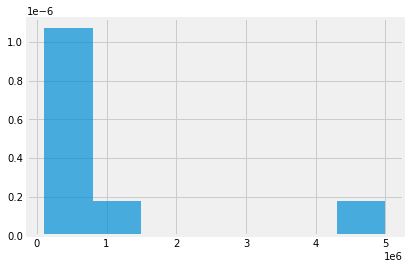

In [24]:
# Histogram with the bin size as data
data = size_bins
_, bins, _ = plt.hist(data, 7, density=1, alpha=0.7)


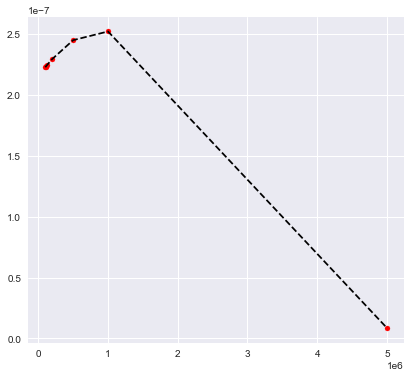

In [25]:
# Make a bell curve chart with bin size 
# A custom function to calculate
# probability distribution function
def pdf(x):
    mean = np.mean(x)
    std = np.std(x)
    y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))
    return y_out
  
# To generate an array of x-values
# x = sunshine_df[""]
x = size_bins  
    
# To generate an array of 
# y-values using corresponding x-values
y = pdf(x)
  
# To fill in values under the bell-curve
# x_fill = np.arange(-2, 2, 0.1)
# y_fill = pdf(x_fill)
  
# Plotting the bell-shaped curve
plt.style.use('seaborn')
plt.figure(figsize = (6, 6))
plt.plot(x, y, color = 'black',
         linestyle = 'dashed')
  
plt.scatter(x, y, marker = 'o',
            s = 25, color = 'red')
  
# plt.fill_between(x_fill, y_fill, 0,
#                  alpha = 0.2, color = 'blue')
plt.show()

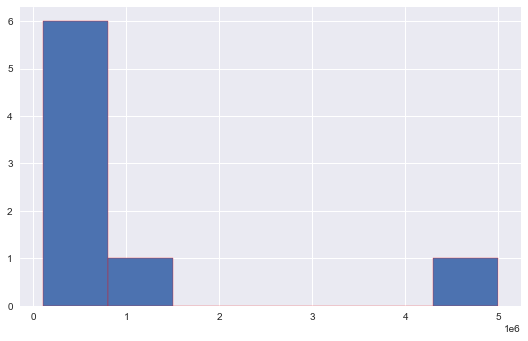

In [26]:
plt.hist(size_bins, edgecolor="red", bins=7)
plt.show()